In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import csv
import names_gen

In [21]:

def create_matrix(filename):
    output = []
    with open(filename, newline='') as f:
        my_list = [list(map(float,rec)) for rec in csv.reader(f, delimiter=' ')]
    for row in my_list:
        output_row = []
        for elem in row:
            if elem%1 ==0 :
                output_row.append(int(elem))
            else:
                output_row.append(elem)
        output.append(output_row)
    return output

In [22]:
import dataclasses
from typing import Dict, List

from node import Node

def create_map(edges: List[List[int]]) -> Dict[int, Node]:
    res = {}
    for e in edges:
        fro = e[0]
        to = e[1]
        if not  fro in res.keys():
            res[fro] = Node(num =fro ,outwards=[to], inwards=[])
        else:
            res[fro].outwards.append(to)
        if not  to in res.keys():
            res[to] = Node(num=to ,outwards=[], inwards=[fro])
        else:
            res[to].inwards.append(fro)
    return res

In [23]:
original = "higgs-social_network.edgelist-1"
test_file = "test_sample"

edges = create_matrix(test_file)
edges

[[1, 2], [2, 4], [6, 4], [2, 6], [6, 1]]

In [24]:
nodes = create_map(edges)
nodes

{1: Node(num=1, outwards=[2], inwards=[6]),
 2: Node(num=2, outwards=[4, 6], inwards=[1]),
 4: Node(num=4, outwards=[], inwards=[2, 6]),
 6: Node(num=6, outwards=[4, 1], inwards=[2])}

In [25]:
def create_min_statement(edges) -> str:
    statement = "min: "
    statement += " + ".join([names_gen.edge_name(e[0], e[1])   for e in edges ])
    return statement

def create_bin_list(edges) -> str:
    statement = "bin "
    statement += ", ".join([names_gen.edge_name(e[0], e[1])  for e in edges ])
    return statement

In [29]:
def parse(edges: List[List[int]], start: int, stop: int) -> str:
    nodes = create_map(edges)
    min_statement = create_min_statement(edges)

    out  = min_statement
    out += ";\n"
    out += "\n"
    out += nodes[start].start() + ";\n"
    out += nodes[stop].end() + ";\n"
    for num, node in nodes.items():
        if num in (start, stop):
            continue
        out += node.mid() + ";\n"

    out += create_bin_list(edges) + ";\n"
    return out
        

out = parse(edges, 1,4)
with open("lp.lp","w") as f: f.write(out)

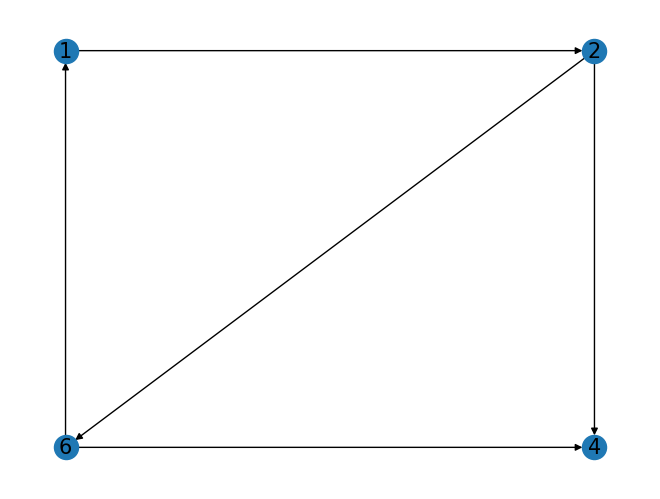

In [27]:
G = nx.DiGraph()
G.add_edges_from(edges)
# G.remove_node(0);


pos = {
    1: (1,3),
    2: (2,3),
    3: (3,3),
    4: (2,2),
    5: (3,2),
    6: (1,2),
    7: (2,1),
}
labels = {i: str(i) for i in range(1,8)}
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=15)
# add labels
plt.show()

In [28]:
nx.dijkstra_path(G, 1,7)

NetworkXNoPath: No path to 7.